([], [])

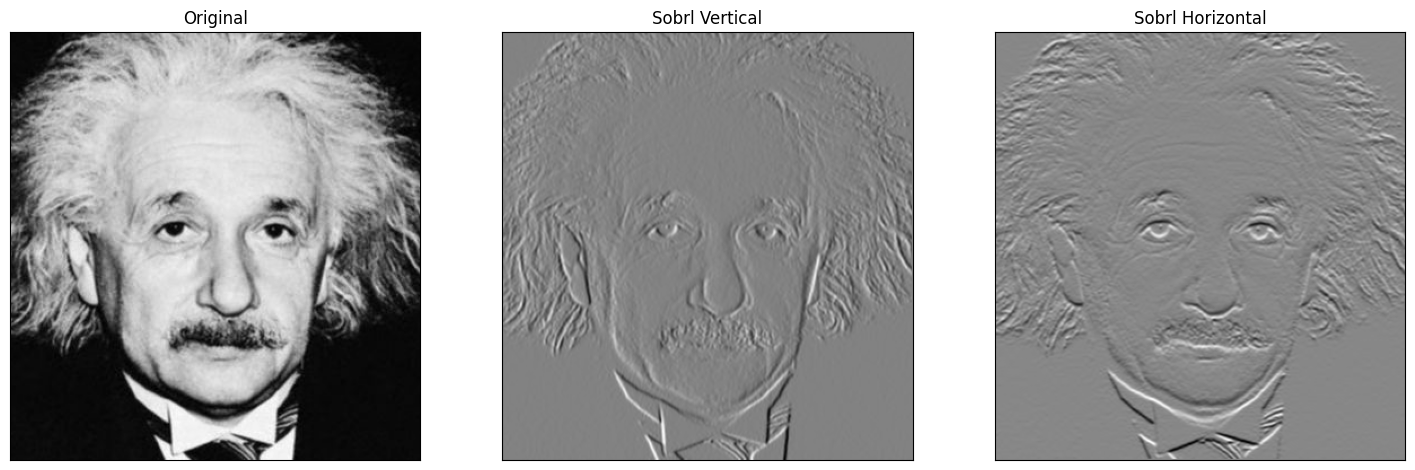

In [14]:
import cv as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

kernal = np.ones((11,11),np.float32)/121
imgc =cv. filter2D(img,-1,kernal)

sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

sobel_x = cv.filter2D(img, cv.CV_64F, sobel_kernel_x)
sobel_y = cv.filter2D(img, cv.CV_64F, sobel_kernel_y)


fig,axes = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(sobel_x, cmap='gray')
axes[1].set_title('Sobrl Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])

axes[2].imshow(sobel_y, cmap='gray')
axes[2].set_title('Sobrl Horizontal')
axes[2].set_xticks([]), axes[0].set_yticks([])



([], [])

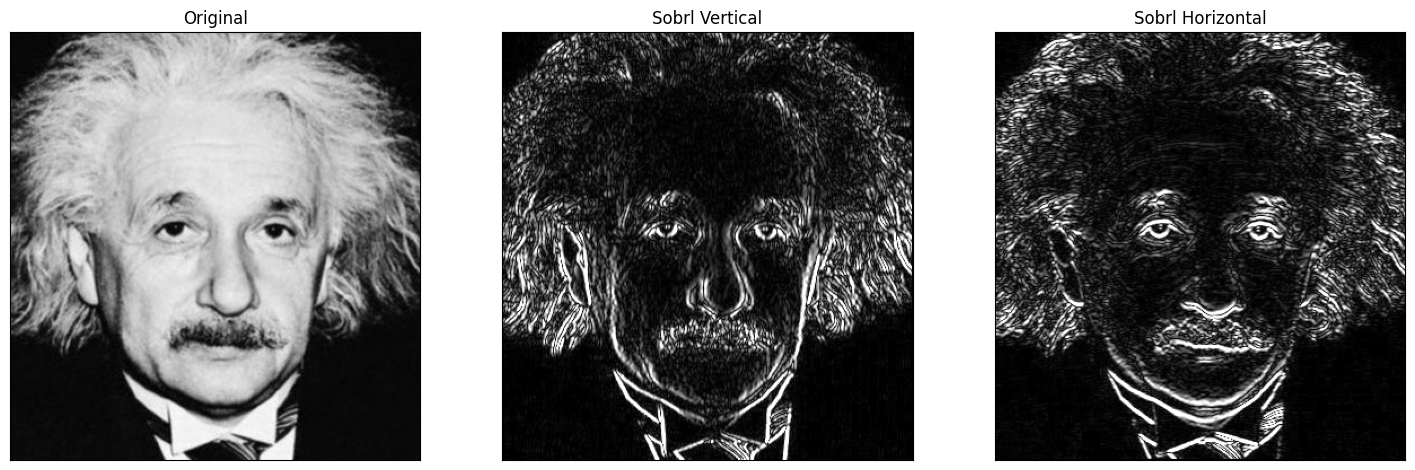

In [4]:
import cv2 as cv
import numpy as np

# Load an image from file
image = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is None:
    print("Error: Unable to load the image.")
    exit()

# Define the Sobel filter kernels
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

# Apply the Sobel filters using filter2D
sobel_x = cv.filter2D(image, cv.CV_64F, sobel_kernel_x)
sobel_y = cv.filter2D(image, cv.CV_64F, sobel_kernel_y)

# Convert the results to uint8 for visualization
sobel_x = cv.convertScaleAbs(sobel_x)
sobel_y = cv.convertScaleAbs(sobel_y)

fig,axes = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,18))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(sobel_x, cmap='gray')
axes[1].set_title('Sobrl Vertical')
axes[1].set_xticks([]), axes[1].set_yticks([])

axes[2].imshow(sobel_y, cmap='gray')
axes[2].set_title('Sobrl Horizontal')
axes[2].set_xticks([]), axes[0].set_yticks([])


(-0.5, 363.5, 379.5, -0.5)

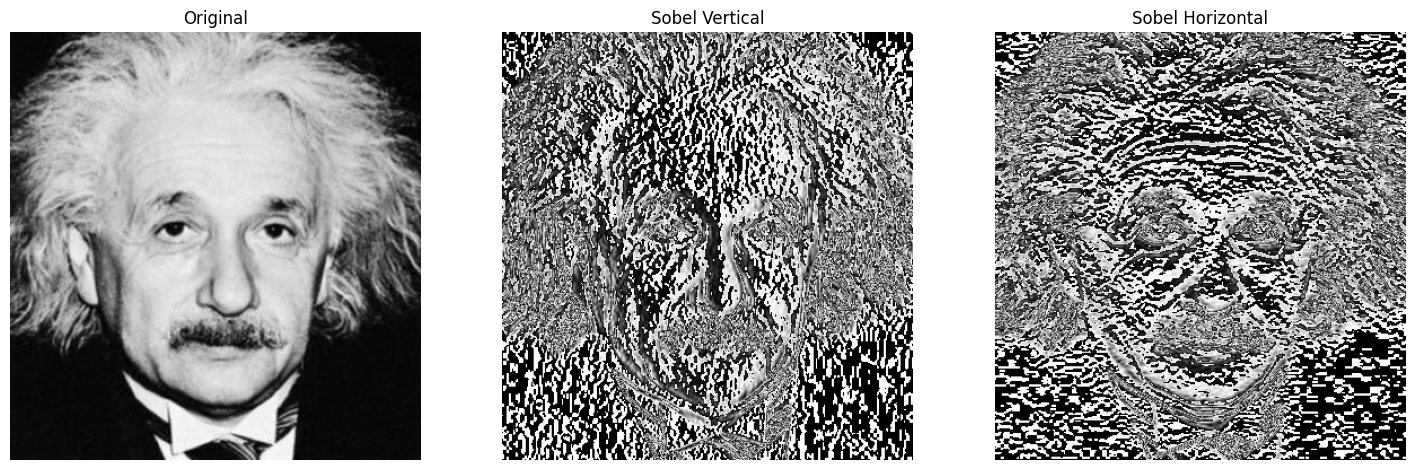

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def sobel_filter(image):

    sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    sobel_x = convolve2d(image, sobel_kernel_x)
    sobel_y = convolve2d(image, sobel_kernel_y)


    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel_x = np.abs(sobel_x).astype(np.uint8)
    sobel_y = np.abs(sobel_y).astype(np.uint8)
    gradient_magnitude = gradient_magnitude.astype(np.uint8)

    return sobel_x, sobel_y, gradient_magnitude

def convolve2d(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape

    pad_height = k_height // 2
    pad_width = k_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='edge')
    
    result = np.zeros_like(image)
    for i in range(height):
        for j in range(width):
            result[i, j] = np.sum(padded_image[i:i+k_height, j:j+k_width] * kernel)

    return result

image = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

if len(image.shape) > 2:
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

sobel_x, sobel_y, gradient_magnitude = sobel_filter(image)

fig, axes = plt.subplots(1, 3, sharex='all', sharey='all', figsize=(18, 18))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

axes[1].imshow(sobel_x, cmap='gray')
axes[1].set_title('Sobel Vertical')
axes[1].axis('off')

axes[2].imshow(sobel_y, cmap='gray')
axes[2].set_title('Sobel Horizontal')
axes[2].axis('off')
